In [ ]:
# Do your work for this exercise in a jupyter notebook named hypothesis_testing.ipynb.

# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

# Has the network latency gone up since we switched internet service providers?
# Is the website redesign any good?
# Is our television ad driving more sales?

In [2]:
# Ho: Latency hasn't changed or is less than that before the switch of isp

# Ha: Latency has gone up after the switch


# True Positive

# low p-value
# Ho is false, reject Ho, latency has gone up
# avg latency after the switch is higher than the average latency before the switch


# False Positive

# low p-value
# Ho is false, reject Ho
# a significant difference found in latency prior to and after
# we found the latency prior was lower than our measured, external factors impact latency
# server crash, downloads, many users etc

# False Negative

# Ho is true , failed to reject
# high p-value
# we found the latency to be equal, sampling bias, technology, time of day of test

    
# # True Negative
# high p-value
# Ho is true, failed to reject
# Latency has stayed the same or gone down

In [ ]:
# Is the website redesign any good?

# Ho: Traffic has stayed the same or got worse

# Ha: Traffic has statistically increased significantly


# True Positive

# low p-value
# Ho is rejected and false, 
# Traffic has statistically increased significantly



# False Positive

# low p-value
# Ho is rejected and true 
# traffic increased, due to external factors, holiday season


# False Negative

# Ho is accepted
# high p-value
# traffic looked like it stayed the same, sample size

    
# # True Negative
# high p-value
# Ho is true, failed to be rejected
# traffic stayed the same or went down, bad design

In [ ]:
# Is our television ad driving more sales?

# Ho: sales have remained the same or decreased

# Ha: sales have statistically increased, significantly


# True Positive

# low p-value
# Ho is rejected and false
# sales has statistically increased, significantly



# False Positive

# low p-value
# Ho is rejected and true 
# sales increased, due to external factors


# False Negative

# Ho is accepted
# high p-value
# sales looked like it stayed the same, but they didnt, sample size

    
# # True Negative
# high p-value
# Ho is true, failed to be rejected
# sales stayed the same, tv ad was a flop

In [3]:
 %matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import user, host, password
from scipy import stats
import csv

np.random.seed(29)

In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.
# Use a .05 level of significance.

In [4]:
sample_1 = stats.norm(90, 15).rvs(40)
sample_2 = stats.norm(100, 20).rvs(50)

stats.ttest_ind(sample_1,sample_2)

# Average time is different, p-value of 0.0015

Ttest_indResult(statistic=-0.9818269584843405, pvalue=0.32887677054120024)

In [16]:
from pydataset import data

data = data('mpg')

df = pd.DataFrame(data)

df2 = df.assign(average_gas = (df.cty + df.hwy)/2)
Gas_1999 = df2[df2.year == 1999].average_gas
Gas_2008 = df2[df2.year == 2008].average_gas

stats.ttest_ind(Gas_1999, Gas_2008)

Ttest_indResult(statistic=0.21960177245940962, pvalue=0.8263744040323578)

<AxesSubplot:>

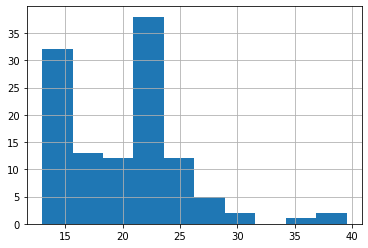

In [22]:
Gas_1999.hist()

<AxesSubplot:>

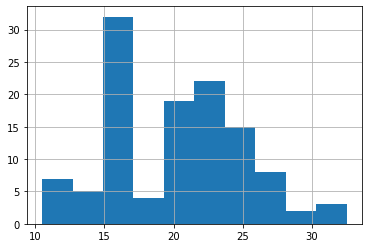

In [21]:
Gas_2008.hist()

In [18]:
compact = df2[df2['class'] == 'compact'].average_gas
not_compact = df2[df2['class'] != 'compact'].average_gas
not_compact

compact_test = stats.ttest_ind(compact, not_compact)
compact_test

Ttest_indResult(statistic=6.731177612837954, pvalue=1.3059121585018135e-10)

In [6]:
x = data.displ
y = data.cty

stats.pearsonr(x,y)

(-0.7985239689348549, 4.737914890206176e-53)

In [7]:
# Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? 
# What happens if you control for phone and internet service?




def get_db_url(username, hostname, password, db_name):
    return f'mysql+pymysql://{username}:{password}@{hostname}/{db_name}'

query = '''
    select tenure, monthly_charges from customers
'''

url = get_db_url(user,host,password,'telco_churn')
charges = pd.read_sql(query,url)
x = charges.tenure
y = charges.monthly_charges

stats.pearsonr(x,y)

(0.24789985628615263, 4.0940449914811555e-99)

In [14]:
# Total charges?

charges = pd.read_csv('telco_churn.csv', index_col=0)

charges
charges.dtypes
charges.dtypes
charges.total_charges.fillna(0, inplace = True)
charges.Tenure_2.fillna(0, inplace = True)
charges[charges.total_charges.isnull() == True]

x = charges.Tenure_2

y = charges.total_charges


stats.pearsonr(x, y)

AttributeError: 'DataFrame' object has no attribute 'total_charges'